In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

import missingno as msno 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [119]:
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId : 0.0
Survived : 0.0
Pclass : 0.0
Name : 0.0
Sex : 0.0
Age : 0.19865319865319866
SibSp : 0.0
Parch : 0.0
Ticket : 0.0
Fare : 0.0
Cabin : 0.7710437710437711
Embarked : 0.002244668911335578


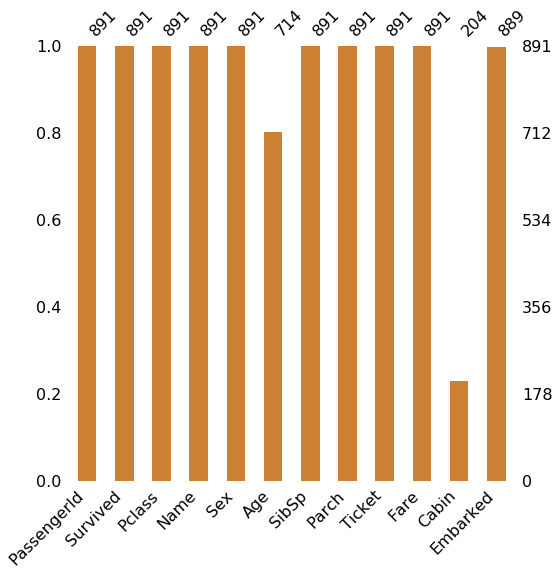

In [5]:
for column in df_train.columns :
    #null값의 갯수 / feature의 총 갯수
    print(f'{column} : {df_train[column].isnull().sum() / df_train[column].shape[0]}')
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

NameError: name 'y_position' is not defined

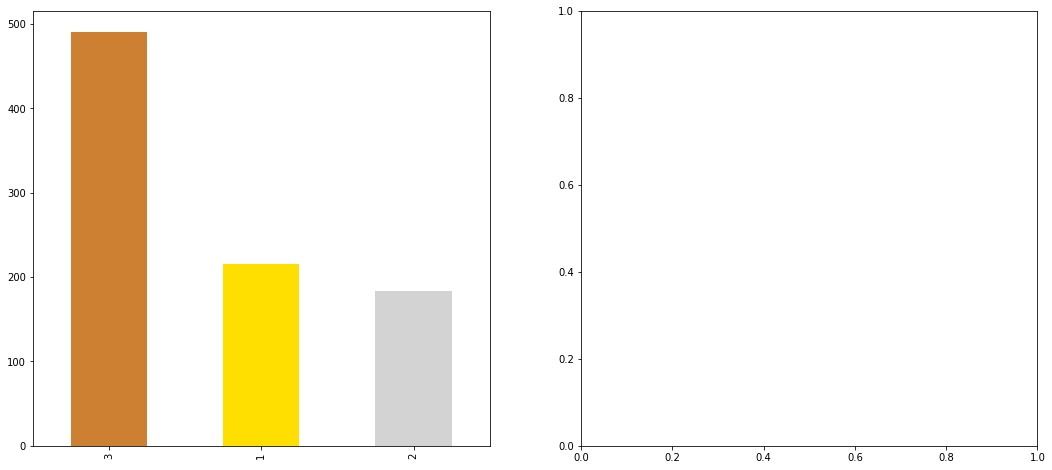

In [6]:
#seaborn의 countplot 이용

f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],
                                              ax=ax[0])
ax[0].set_title('Num of Passengers for each Pclass',y=y_position)   
ax[0].set_ylabel('COUNT')

sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass:Survivd vs Dead',y=y_position)

plt.show

df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()
 #평균으로 생존률 도출

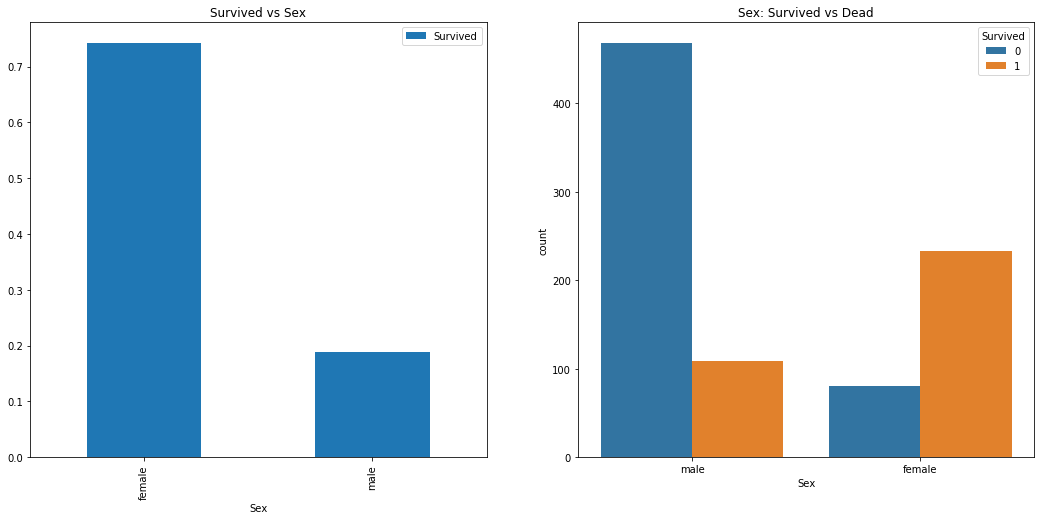

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
mean=df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean()
mean.plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

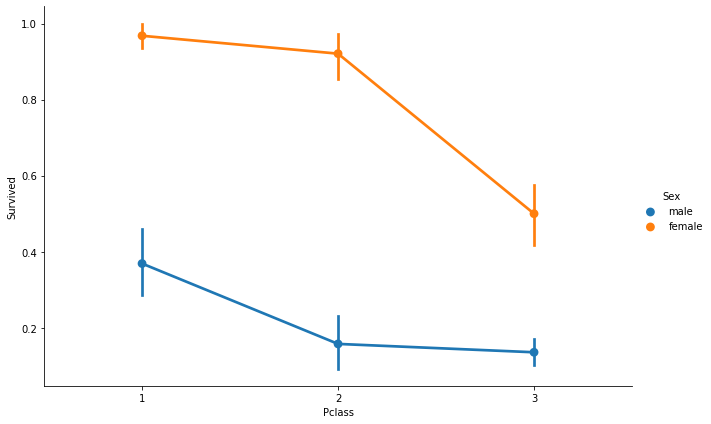

In [8]:
#factorplot 이용하여 sex별 pclass의 survived 정도를 볼 수 있다
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train,
                  size=6,aspect=1.5)

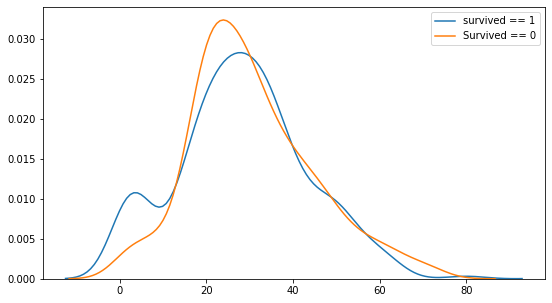

In [9]:
#Age
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['survived == 1', 'Survived == 0'])
plt.show()

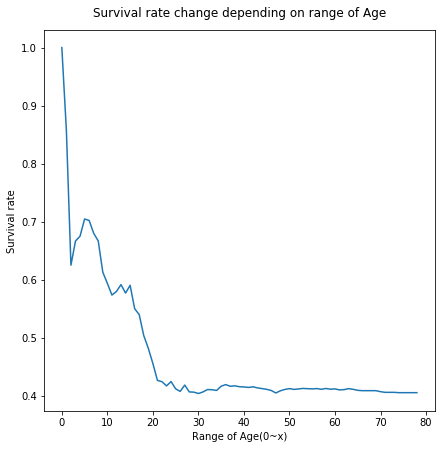

In [10]:
cummulate_survival_ratio=[]
for i in range(1,80) :
    cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

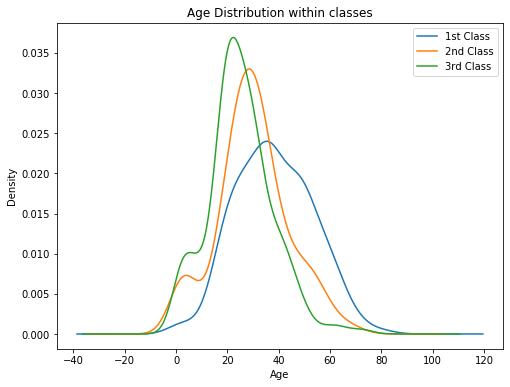

In [11]:
#Age 별 Pclass 차지 비율
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

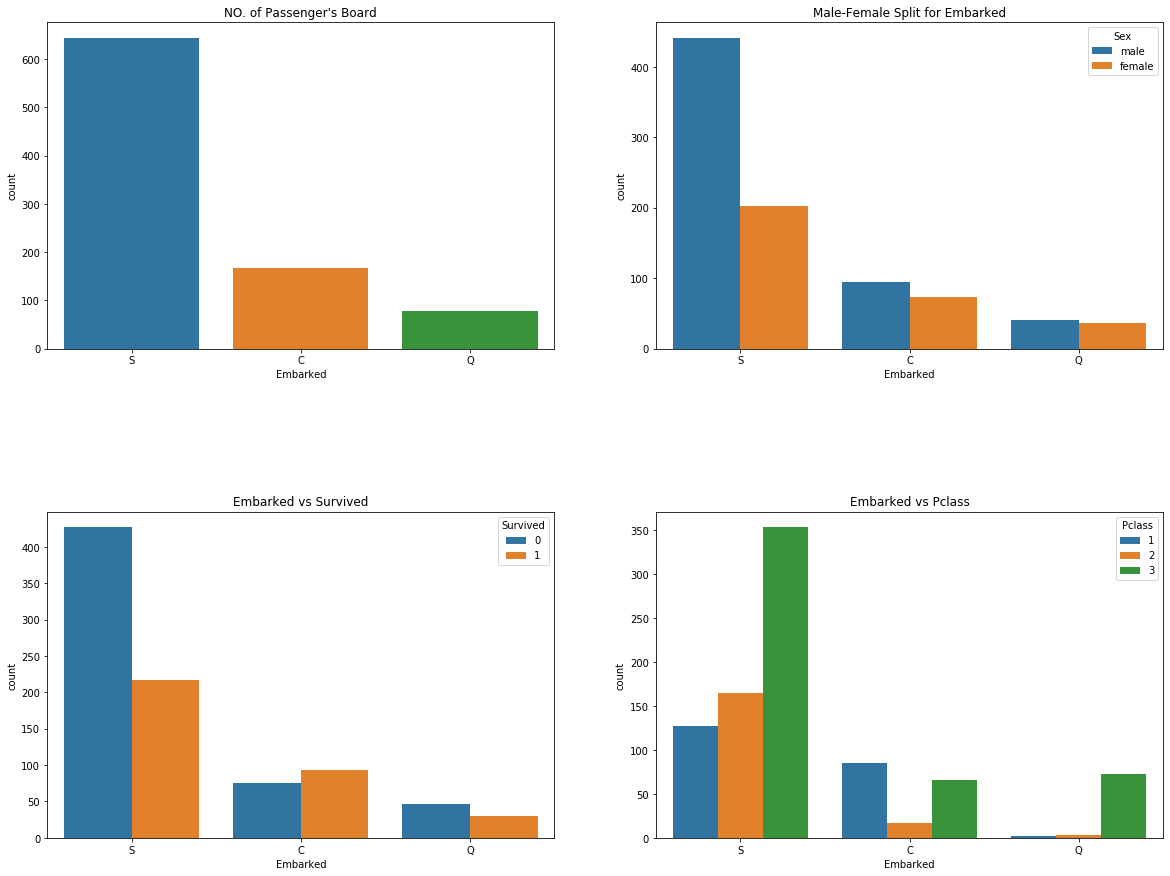

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [12]:
#Embarked
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train, ax=ax[0,0])
ax[0,0].set_title("NO. of Passenger's Board")
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean()


In [13]:
#가족 / 형제 + 부모 => FamilySize
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

Text(0.5, 1.02, 'Survived rate depending on FamilySize')

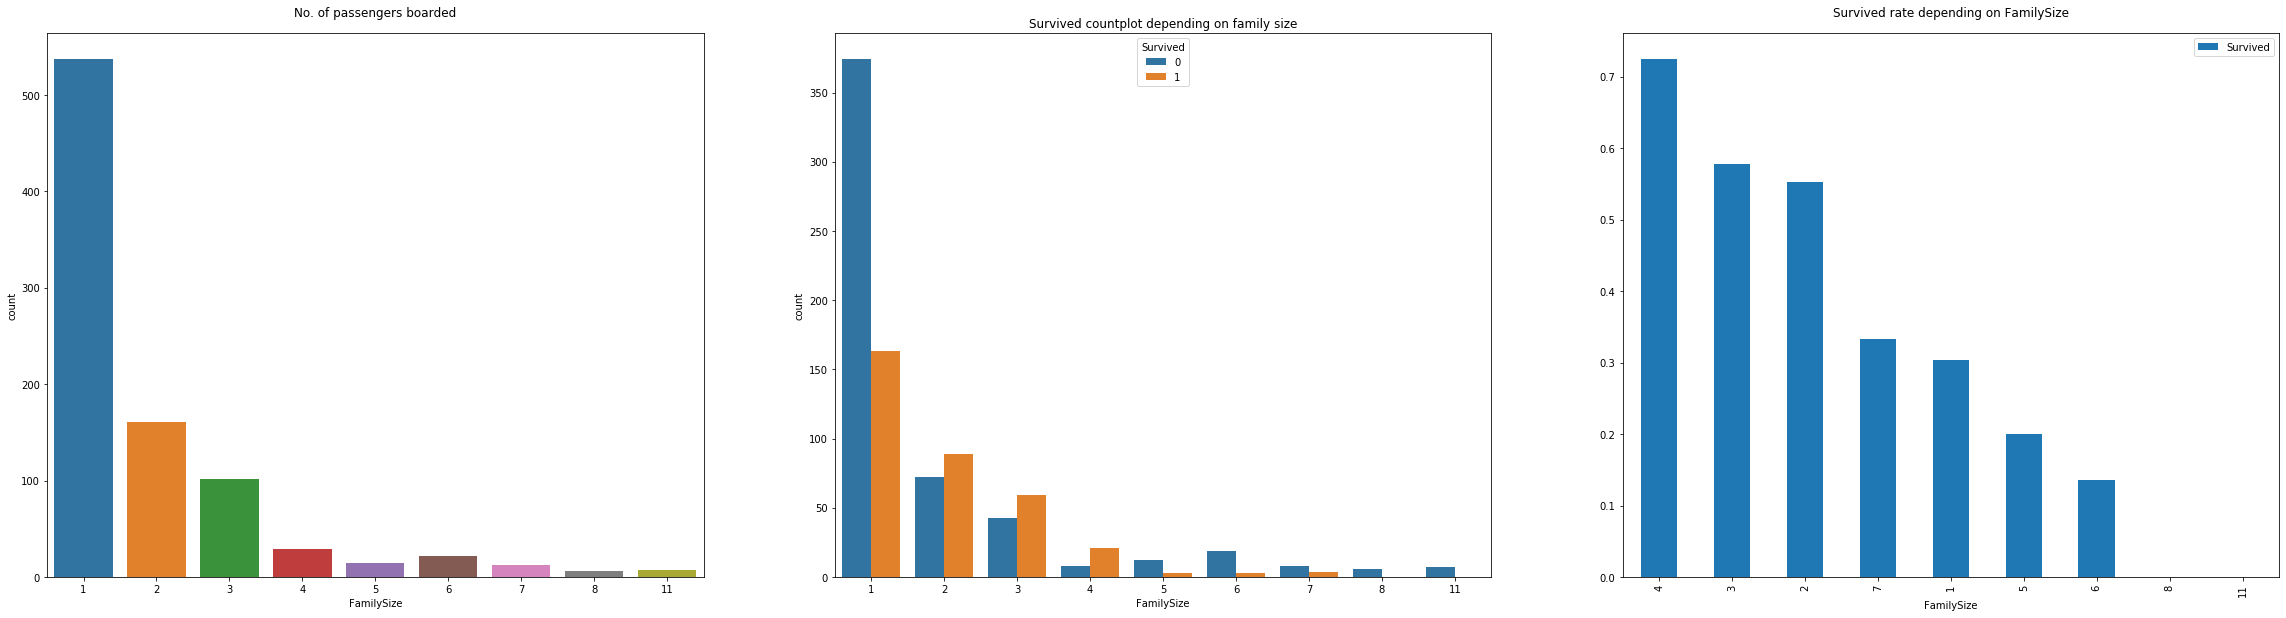

In [14]:
f,ax=plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('No. of passengers boarded', y=1.02)

sns.countplot('FamilySize',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived countplot depending on family size')

family_mean=df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean()
family_mean.sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('Survived rate depending on FamilySize', y=1.02)

In [15]:
#탑승요금 Fare
print(df_train['Fare'].value_counts())
#갯수가 많름

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64


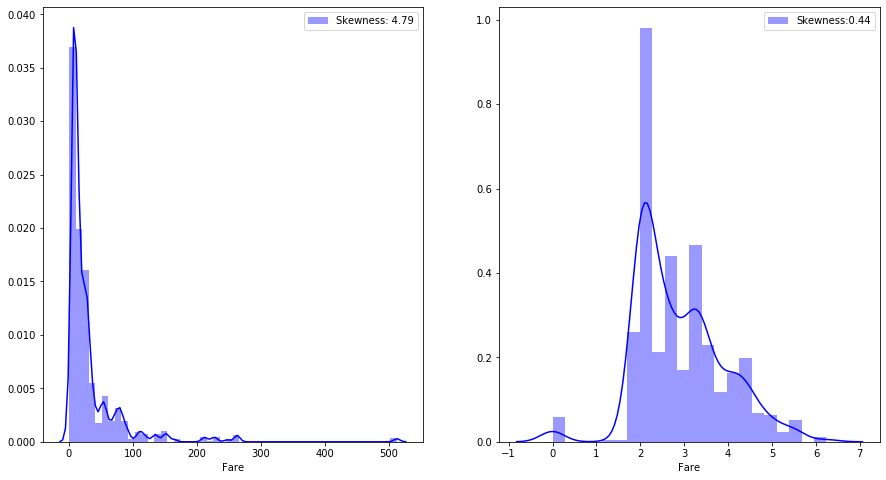

In [16]:
#히스토그램 
fig, ax = plt.subplots(1,2,figsize=(15,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()) , ax=ax[0])
g=g.legend(loc='best')

#너무 심하게 두드러지는 부분이 있어 비대칭이 심함
#영향을 줄이기위해 log를 취한다.

# 각 데이터의 값에 log를 취해주기 위한 방법 lamda함수를 이용해 map으로 인수를 넣어줌
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
#df_train['Fare']의 내용물을 map으로 하나씩 i로 꺼내어 log 취함
#이건 i>0일 경우에만 이고 그렇지 않으면 그냥 0으로 만듦

df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)
g=sns.distplot(df_train['Fare'], color='b', label='Skewness:{:.2f}'.format(df_train['Fare'].skew()), ax=ax[1])
g= g.legend(loc='best')

In [264]:
#Ticket
# Ticket과 Pclass의 관계로 
import pprint
t={'str':[],'int':[]}
for i in df_train['Ticket'].values :
    try :
        num=int(i)
        if num not in t['int'] :
            t['int'].append(i)
    except ValueError :
        if i not in t['str'] :
            t['str'].append(i)
# print(len(t['int']))
# print(sorted(t['int']))
# print(t['str'])

m=df_train[df_train['Ticket'].isin(t['int'])]
n=df_train[df_train['Ticket'].isin(t['str'])]

s={'1':[],'2':[],'3':[]}
for i in range(1,4) :
    for j in sorted(m[m['Pclass'].isin([i])]['Ticket']) :
        s[str(i)].append(j)
    for j in sorted(n[n['Pclass'].isin([i])]['Ticket']) :
        s[str(i)].append(j)
# pprint.pprint(s)

# for string in s['3'] :
#     if string[0].isalpha() :
# #         print("".join(re.findall('[A-Z]',string)))
#         continue
#     else :
#         print(string)

# class_ticket=[]
# for ticket in df_train['Ticket'] :
#     for j in range(1,4) :
#         if ticket in s[str(j)] :
#             print(f'{ticket}은 Pclass {j}등급에 탔음')
#             class_ticket.append(j-1)
            
# print(class_ticket)
# print(len(df_train['Ticket']),len(class_ticket))

import re
from sklearn import preprocessing
y_true_label_encoder = preprocessing.LabelEncoder()

class_ticket=[]
encoding_ticket=[]
num_ticket=[]
for ticket in df_train['Ticket'] :
    a,b,c='','',''
    for t in ticket.split() :
        if t[0].isalpha() :
            a="".join(re.findall('[A-Z]',t))
            b="".join(re.findall('[0-9]',t))
        elif t[0].isdigit() :
            c=t
    num_ticket.append(a+b+c)
class_ticket= y_true_label_encoder.fit_transform(num_ticket)
print(class_ticket)
# for i in range(len(encoded)) :
#     ticket_encode=str(encoded[i])
#     if num_ticket[i] == '' :
#         pass
#     else :
#         ticket_encode+=(num_ticket[i])
#     class_ticket.append((ticket_encode))

[524 596 656  49 472 275  85 395 344 132 616  38 528 333 413 153 480 151
 301 184 139 152 278  42 395 329 179  95 283 362 598 586 288 553 600  43
 202 529 302 186 507  53 391 623 282 619 462  76 190 377 249 516 587 239
  29  94 559 215 565 549 197  32 457 337 601 189 557 653 248 270 561 549
 631 204  80 347 355 473 158 432 304 311 280  25 632 247 677 649  95 297
 298 341 679 551 428 475 607 612 117 150 384 361 417 505 245 354 296 254
 388 469   2 193 274 491 176 670 460  53 585 333 631 519 132 219 417 186
 463 542 196 318 380 640 534 111 556 627  55  49 504 592 203 332 655 438
 118 562 405 677 113 147 633  36 521 539 570 595 418 652 258 552 470 563
 323 265 249 423  28 337 576  80   5 480 344 663  90 412 488 593 169 575
 552 626 329 114 271  34 459  11 435 386 122 227 406 113 604 586 452 494
 461 160 306 552 242 177 536 316 247 216 445  17 642 572 527 163 443 416
 657 142  63 673 651 105 102 375  93 615 671 526 125 488 457 322 128 329
 558 678 198 560 231 622 193 444 675 662 213  92 32

In [175]:
#문자만 없애는 것
